<a href="https://colab.research.google.com/github/Kiran-Venkatesh/KV/blob/master/16PW17_WS1_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import keras
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pandas as pd

def define_model():
  model = Sequential()

  model.add(Conv2D(filters=6, input_shape=(28,28,1), kernel_size=(5,5), strides=(1,1), padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Activation("sigmoid"))

  model.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Activation("sigmoid"))
  model.add(Dropout(0.5))

  model.add(Conv2D(filters=120, kernel_size=(1,1), strides=(1,1), padding='same'))
  
  model.add(Flatten())
  model.add(Dense(84))
  model.add(Activation("sigmoid"))
  model.add(Dense(10))
  model.add(Activation('softmax'))
  
  
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model
def summarize_diagnostics(history):
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
  filename = sys.argv[0].split('/')[-1]
  pyplot.savefig(filename + '_plot.png')
  pyplot.close()


model=define_model()
train = pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

X_train=standardize(X_train)

y_train= to_categorical(y_train)
print(X_train.shape,X_test.shape,y_train.shape)
num_classes = y_train.shape[1]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
from keras.preprocessing import image
gen = image.ImageDataGenerator()

batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

history=model.fit_generator(batches, steps_per_epoch=len(batches),validation_data=val_batches, validation_steps=len(val_batches), epochs=2,verbose=1)

_, acc = model.evaluate_generator(val_batches, steps=len(val_batches),verbose=0)
print('> %.3f' % (acc * 100.0))
summarize_diagnostics(history)

(42000, 28, 28, 1) (28000, 28, 28, 1) (42000, 10)
Epoch 1/2
591/591 [==============================] - 27s 46ms/step - loss: 0.8774 - accuracy: 0.7129 - val_loss: 0.2520 - val_accuracy: 0.9298
Epoch 2/2
591/591 [==============================] - 27s 46ms/step - loss: 0.2422 - accuracy: 0.9276 - val_loss: 0.1436 - val_accuracy: 0.9602
Instructions for updating:
Please use Model.evaluate, which supports generators.
> 96.024


***P5) MLP for MNIST Dataset Handwritten Digit Classification*** 

In [ ]:
import pandas as pd
from sklearn import datasets,preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report,roc_auc_score,f1_score,precision_recall_fscore_support,precision_score,recall_score,accuracy_score

mnist = datasets.load_digits()
DATA=mnist
X = DATA.data
Y = DATA.target


In [ ]:
import math
def forward_backward_softmax_cross_entropy(x,y,v,w,eta,epochs,xt,yt):
  E=[]
  xe=[]
  c=0
  ycap=[]
  print("Initial Weights between i/p & hidden:",v)
  print("Initial Weights between hidden & o/p:",w)
    
  #Training Part
  for t in range(epochs):
    Error=0
    for i in range(len(y)):
      Ii=x[i]
      Ii=np.insert(Ii, 0, 1, axis=0)
      Oi=Ii
      Ih=np.matmul(np.transpose(v),Oi)
      Oh=1/(1+np.exp(-Ih))
      Oh=np.insert(Oh, 0, 1, axis=0)
      Io=np.matmul(np.transpose(w),Oh)
      Oo=[]
      for io in Io:
        Oo.append(np.exp(io)/np.sum(np.exp(Io)))

      Error+=-sum(y[i]*np.log2(Oo))
      yc=[0]*len(Oo)
      yc[np.argmax(Oo)]=1
      if yc==list(y[i]):
        c=c+1
        continue
      else:
        Ebyw1=-(y[i]-Oo)
        Ebyw1=Ebyw1.reshape(-1,1)
        #Oh=np.array([hk+2.5 for hk in Oh])
        Oh=Oh.reshape(-1,1)
        delEbydelw=np.dot(Oh,np.transpose(Ebyw1))
        delEbydelv=np.dot(w,Ebyw1)
        #print(Ih)
        #print("Hi1:",delEbydelv)
        Ii=Ii.reshape(-1,1)
        delEbydelv=delEbydelv*Oh*(1-Oh)
        #print(Oh)
        #print(1-Oh)
        #print("Hi2:",delEbydelv)
        #with_bias=Oh*(1-Oh)*Ii
        delEbydelv=np.delete(delEbydelv,0)
        delEbydelv=delEbydelv.reshape(-1,1)
        delEbydelv=np.dot(Ii,np.transpose(delEbydelv))
        #print("Hi3:",delEbydelv)
        w=w-np.dot(eta,delEbydelw)
        v=v-np.dot(eta,delEbydelv)
        #print(Ih,Oh,Io,Oo,delEbydelw,delEbydelv)
        #print(w,v)

    E.append(Error)
    xe.append(t)
    if c==len(y):
      print("Convergence")
      break
    else:
      c=0
  print("Total Epochs:",t)
  print("Final Weights between i/p & hidden:",v)
  print("Final Weights between hidden & o/p:",w)
  print("Final Training Error:",Error)
  
  fig = plt.figure(figsize = (10, 5))
  plt.plot(xe,E,color="blue")
  plt.xlabel("Number of epochs")
  plt.ylabel("Error Loss")
  plt.show()

  #Testing Part
  crct=0
  y_pred=[]
  for i in range(len(yt)):
    yc=[]
    Ii=xt[i]
    Ii=np.insert(Ii, 0, 1, axis=0)
    Oi=Ii
    Ih=np.matmul(np.transpose(v),Oi)
    Oh=1/(1+np.exp(-Ih))
    #Oh=np.array([hk+2.5 for hk in Oh])
        
    Oh=np.insert(Oh, 0, 1, axis=0)
    Io=np.matmul(np.transpose(w),Oh)
    Oo=[]
    for io in Io:
      Oo.append(np.exp(io)/np.sum(np.exp(Io)))

      
    yc=[0]*len(Oo)
    yc[np.argmax(Oo)]=1
    y_pred.append(yc)
    if list(yt[i])==yc:
      crct+=1
  print("Test Accuracy:",crct/len(yt))
  y_est=y_pred
  y_pred=np.argmax(np.array(y_pred), axis=1)
  y_true=np.argmax(np.array(yt), axis=1)
  print(classification_report(y_true, y_pred))
  print(precision_recall_fscore_support(y_true, y_pred))
  print("Accuracy:",accuracy_score(y_true,y_pred))
  print("Precision:",precision_score(y_true,y_pred,average='weighted'))
  print("Recall:",recall_score(y_true,y_pred,average='weighted'))
  print("F1_score:",f1_score(y_true,y_pred,average='weighted'))
  print("ROC_AUC_Score_array:",roc_auc_score(yt,y_est,average=None))
  print("ROC_AUC_Score_array:",roc_auc_score(yt,y_est,average='weighted'))


(1257, 64) (540, 64) (1257, 10) (540, 10)
Initial Weights between i/p & hidden: [[0.47015996 0.25012152 0.42678434 ... 0.91952756 0.82432607 0.06523987]
 [0.47969456 0.27002939 0.05383192 ... 0.53128216 0.05168841 0.58255965]
 [0.14571525 0.7779985  0.94812423 ... 0.36343146 0.7954323  0.72654494]
 ...
 [0.820961   0.41119103 0.03905607 ... 0.38678399 0.19509065 0.55573547]
 [0.3813642  0.23106817 0.32708594 ... 0.3592931  0.45700224 0.49255249]
 [0.97716212 0.61860724 0.0298887  ... 0.35953287 0.9918361  0.75820998]]
Initial Weights between hidden & o/p: [[0.45724672 0.60717341 0.25495759 0.04736414 0.98894912 0.8385059
  0.83780173 0.75050451 0.32594548 0.44813434]
 [0.76785891 0.82249907 0.81346324 0.83553562 0.37660203 0.8030187
  0.57280432 0.32968774 0.48054287 0.92147048]
 [0.74852131 0.37884655 0.72726938 0.07357466 0.47841642 0.07136477
  0.2541375  0.34837475 0.74382263 0.61639914]
 [0.56776377 0.59756491 0.09199813 0.83982462 0.99287352 0.5759899
  0.27630082 0.62176271 0.43

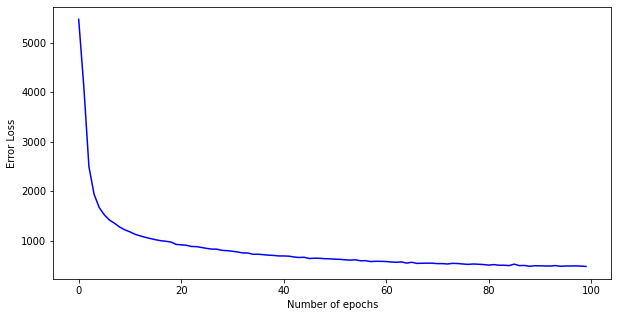

Test Accuracy: 0.9574074074074074
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.94      0.96      0.95        50
           2       0.96      0.94      0.95        47
           3       1.00      0.94      0.97        54
           4       0.97      1.00      0.98        60
           5       0.95      0.89      0.92        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.84      0.95      0.89        43
           9       0.95      0.97      0.96        59

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540

(array([0.98076923, 0.94117647, 0.95652174, 1.        , 0.96774194,
       0.9516129 , 0.98113208, 1.        , 0.83673469, 0.95      ]), array([0.96226415, 0.96      , 0.93617021, 0.94444444, 1.        ,
   

In [ ]:
X = preprocessing.normalize(X)
Y=pd.get_dummies(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
num_input = X_train.shape[1]
num_hidden = 32
num_output = Y_test.shape[1]
v = np.random.rand(num_input+1,num_hidden)   #(l+1)xm
w = np.random.rand(num_hidden+1,num_output)  #(m+1)xn

Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
eta=0.1
epochs=100
#forward_backward_relu(X_train,y_train,v,w,eta,epochs,X_test,y_test)
#forward_backward(X_train,Y_train,v,w,eta,epochs,X_test,Y_test)
forward_backward_softmax_cross_entropy(X_train,Y_train,v,w,eta,epochs,X_test,Y_test)


In [ ]:
[0,0,1]*np.log2([1,3,4])


array([0., 0., 2.])

***P2) Sigmoid Neuron for Iris 2 classes***

(70, 4) (30, 4) (70,) (30,)
Initial Weights between i/p & o/p: [0.76986949 0.79606339 0.7422891  0.48631902 0.56684723]
Convergence: True
Total Epochs: 1119
Final Weights between i/p & o/p: [1.33e-322 1.33e-322 1.33e-322 1.33e-322 1.33e-322]
Final Training Error: 8.75


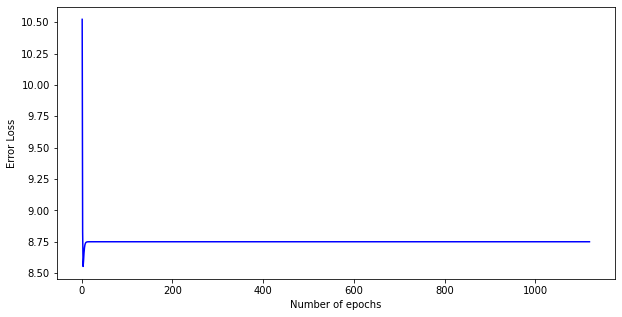

Test Accuracy: 0.5
Predicted: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Actual: [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.50      1.00      0.67        15

    accuracy                           0.50        30
   macro avg       0.25      0.50      0.33        30
weighted avg       0.25      0.50      0.33        30

(array([0. , 0.5]), array([0., 1.]), array([0.        , 0.66666667]), array([15, 15]))
Accuracy: 0.5
Precision: 0.25
Recall: 0.5
F1_score: 0.3333333333333333
ROC_AUC_Score_array: 0.5
ROC_AUC_Score_array: 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def c(x):
  return np.double(x)

def sigmoid_neuron(x,y,w,eta,epochs,xt,yt):
  t=0
  ycap=1
  E=[]
  xe=[]
  cnt=0
  f=False
  #Training Part
  while not f:
    t=t+1
    Error=0
    prev=w
    for i in range(len(y)):
      Ii=x.iloc[i].values
      Ii=np.insert(Ii, 0, 1, axis=0)
      Oi=Ii
      Io=np.matmul(np.transpose(w),Oi)
      Oo=1/(1+np.exp(-Io))
      Error+=((y.iloc[i]-Oo)**2)/2
      if Oo>=0.5:
        ycap=1
      else:
        ycap=0
      if ycap==y.iloc[i]:
        continue
      else:
        dohLbydohw=-np.dot(w,(y.iloc[i]-Oo)*Oo*(1-Oo))
        w=w-np.dot(eta,dohLbydohw)
    E.append(Error)
    xe.append(t)
    v = np.array(prev) == np.array(w)
    if v.all()==True:
      print("Convergence:",v.all())
      f=True
      break
  print("Total Epochs:",t)
  print("Final Weights between i/p & o/p:",w)
  print("Final Training Error:",Error)
    
  fig = plt.figure(figsize = (10, 5))
  plt.plot(xe,E,color="blue")
  plt.xlabel("Number of epochs")
  plt.ylabel("Error Loss")
  plt.show()

  #Test Part
  crct=0
  y_pred=[]
  
  for i in range(len(yt)):
    Ii=xt.iloc[i].values
    Ii=np.insert(Ii, 0, 1, axis=0)
    Oi=Ii
    Io=np.matmul(np.transpose(w),Oi)
    Oo=1/(1+np.exp(-Io))
    if Oo>=0.5:
      ycap=1
    else:
      ycap=0
    y_pred.append(ycap)
    if yt.iloc[i]==ycap:
      crct+=1
  
  print("Test Accuracy:",crct/len(yt))
  y_est=y_pred
  y_true=yt
  print("Predicted:",y_pred)
  print("Actual:",list(y_true))
  print(classification_report(y_true, y_pred))
  print(precision_recall_fscore_support(y_true, y_pred))
  print("Accuracy:",accuracy_score(y_true,y_pred))
  print("Precision:",precision_score(y_true,y_pred,average='weighted'))
  print("Recall:",recall_score(y_true,y_pred,average='weighted'))
  print("F1_score:",f1_score(y_true,y_pred,average='weighted'))
  print("ROC_AUC_Score_array:",roc_auc_score(yt,y_est,average=None))
  print("ROC_AUC_Score_array:",roc_auc_score(yt,y_est,average='weighted'))


  



    
        
      


import pandas as pd
import numpy as np

df=pd.read_csv("Iris.csv")
sgdf=df.loc[df["Species"].isin(["Iris-versicolor","Iris-setosa"])]
X=sgdf[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X_norm=(X-X.min())/(X.max()-X.min())
Y=sgdf['Species'].astype('category')
Y_one_hot=Y.cat.codes
#w=[c(1.0),c(2.0),c(3.0),c(4.0),c(5.0)]
w=np.random.rand(5)
eta=0.15
epochs=1000
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y_one_hot, test_size=0.3,stratify=Y_one_hot)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print("Initial Weights between i/p & o/p:",w)
  
sigmoid_neuron(X_train,Y_train,w,eta,epochs,X_test,Y_test)
#print(Y_train)





***P4) MLP for IRIS Dataset (3-class classification)***

In [ ]:
def forward_backward_sum_of_square_sigmoid(x,y,v,w,eta,epochs,xt,yt):
  E=[]
  xe=[]
  c=0
  ycap=[]
  #Training Part
  for t in range(epochs):
    Error=0
    for i in range(len(y)):
      Ii=x[i]
      Ii=np.insert(Ii, 0, 1, axis=0)
      Oi=Ii
      Ih=np.matmul(np.transpose(v),Oi)
      Oh=1/(1+np.exp(-Ih))
      Oh=np.insert(Oh, 0, 1, axis=0)
      Io=np.matmul(np.transpose(w),Oh)
      Oo=1/(1+np.exp(-Io))
      Error+=sum((y[i]-Oo)**2)/2
      yc=[0]*len(Oo)
      yc[np.argmax(Oo)]=1
      if yc==list(y[i]):
        c=c+1
        continue
      else:
        Ebyw1=-(y[i]-Oo)*Oo*(1-Oo)
        Ebyw1=Ebyw1.reshape(-1,1)
        #Oh=np.array([hk+2.5 for hk in Oh])
        Oh=Oh.reshape(-1,1)
        delEbydelw=np.dot(Oh,np.transpose(Ebyw1))
        delEbydelv=np.dot(w,Ebyw1)
        #print(Ih)
        #print("Hi1:",delEbydelv)
        Ii=Ii.reshape(-1,1)
        delEbydelv=delEbydelv*Oh*(1-Oh)
        #print(Oh)
        #print(1-Oh)
        #print("Hi2:",delEbydelv)
        #with_bias=Oh*(1-Oh)*Ii
        delEbydelv=delEbydelv[list(range(1,len(Oh)))]
        delEbydelv=np.dot(Ii,np.transpose(delEbydelv))
        #print("Hi3:",delEbydelv)
        w=w-np.dot(eta,delEbydelw)
        v=v-np.dot(eta,delEbydelv)
        #print(Ih,Oh,Io,Oo,delEbydelw,delEbydelv)
        #print(w,v)

    E.append(Error)
    xe.append(t)
    print("Epochs:",t)
    print("Weights between i/p & hidden:",v)
    print("Weights between hidden & o/p:",w)
    print("Error:",Error)
    print(c)
    if c==len(y):
      print("Convergence")
      break
    else:
      c=0

  fig = plt.figure(figsize = (10, 5))
  plt.plot(xe,E,color="blue")
  plt.xlabel("Number of epochs")
  plt.ylabel("Error Loss")
  plt.show()

  #Test Part
  crct=0
  y_pred=[]
  for i in range(len(yt)):
    yc=[]
    Ii=xt[i]
    Ii=np.insert(Ii, 0, 1, axis=0)
    Oi=Ii
    Ih=np.matmul(np.transpose(v),Oi)
    Oh=1/(1+np.exp(-Ih))
    #Oh=np.array([hk+2.5 for hk in Oh])
        
    Oh=np.insert(Oh, 0, 1, axis=0)
    Io=np.matmul(np.transpose(w),Oh)
    Oo=1/(1+np.exp(-Io))
    yc=[0]*len(Oo)
    yc[np.argmax(Oo)]=1
    y_pred.append(yc)
    if list(yt[i])==yc:
      crct+=1
  print("Test Accuracy:",crct/len(yt))
  y_est=y_pred
  y_pred=np.argmax(np.array(y_pred), axis=1)
  y_true=np.argmax(np.array(yt), axis=1)
  print(y_est)
  print(y_pred)
  print(y_true)
  print(classification_report(y_true, y_pred))
  print(precision_recall_fscore_support(y_true, y_pred))
  print("Accuracy:",accuracy_score(y_true,y_pred))
  print("Precision:",precision_score(y_true,y_pred,average='weighted'))
  print("Recall:",recall_score(y_true,y_pred,average='weighted'))
  print("F1_score:",f1_score(y_true,y_pred,average='weighted'))
  print("ROC_AUC_Score_array:",roc_auc_score(yt,y_est,average=None))
  print("ROC_AUC_Score_array:",roc_auc_score(yt,y_est,average='weighted'))


In [ ]:
u=[2,2]
u=[uo+2 for uo in u]
u

[4, 4]

(105, 4) (45, 4) (105, 3) (45, 3)
Initial Weights between i/p & hidden: [[0.28273777 0.80920727 0.61917192]
 [0.62656997 0.98609832 0.46435833]
 [0.69255013 0.36257124 0.18110154]
 [0.42354322 0.29642281 0.17393194]
 [0.4687635  0.57837129 0.19825032]]
Initial Weights between hidden & o/p: [[0.62504887 0.22413867 0.91138663]
 [0.95955867 0.12521873 0.07317864]
 [0.73137478 0.12103872 0.4348588 ]
 [0.56184461 0.33960828 0.06876594]]
Total Epochs: 99
Final Weights between i/p & hidden: [[-0.31631817 -0.07634455 -0.15949124]
 [ 1.70112899 -0.06543882 -0.09203237]
 [ 2.86092    -0.55585037 -0.39244856]
 [-4.30980966  0.99309969  0.18532722]
 [-1.91876303  0.99811064  0.14072995]]
Final Weights between hidden & o/p: [[-1.0184139   1.1684555   1.61053256]
 [ 4.69675195 -0.62627174 -2.91252418]
 [-1.19216224  0.991123    1.48831155]
 [-0.44916936  0.82267204  0.59671615]]
Final Training Error: 100.02424007454688


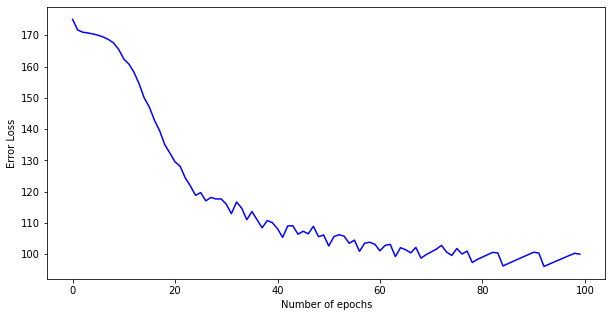

Test Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

(array([1.        , 1.        , 0.92857143]), array([1.        , 0.92307692, 1.        ]), array([1.        , 0.96      , 0.96296296]), array([19, 13, 13]))
Accuracy: 0.9777777777777777
Precision: 0.9793650793650793
Recall: 0.9777777777777777
F1_score: 0.9777448559670783
ROC_AUC_Score_array: [1.         0.96153846 0.984375  ]
ROC_AUC_Score_array: 0.984375


In [ ]:
iris= datasets.load_iris()
DATA=iris
X = DATA.data
Y = DATA.target

X = preprocessing.normalize(X)
Y=pd.get_dummies(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
num_input = X_train.shape[1]
num_hidden = 3
num_output = Y_test.shape[1]
v = np.random.rand(num_input+1,num_hidden)   #(l+1)xm
w = np.random.rand(num_hidden+1,num_output)  #(m+1)xn

Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
eta=0.1
epochs=100
#forward_backward_relu(X_train,y_train,v,w,eta,epochs,X_test,y_test)
#forward_backward(X_train,Y_train,v,w,eta,epochs,X_test,Y_test)
forward_backward_softmax_cross_entropy(X_train,Y_train,v,w,eta,epochs,X_test,Y_test)


In [ ]:
[1,1,0]==[1,0,1]

False

***P3) MLP for XOR Gate***

Initial Weights between i/p & hidden: [[-1.0, 35.0], [20.0, -10.0], [10.0, -30.0]]
Initial Weights between hidden & o/p: [-20, 25, 10]
Final Epochs: 880
Final Weights between i/p & hidden: [[ -1.          34.86364008]
 [ 20.         -10.13635992]
 [ 10.         -30.13635992]]
Final Weights between hidden & o/p: [[-22.52826373]
 [ 22.47173627]
 [  9.98627918]]
Final Error: [0.12350187]


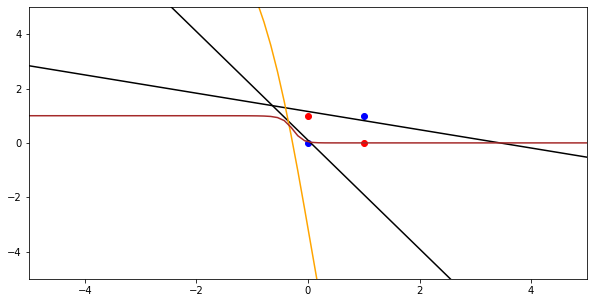

Convergence Predicted: [1, 1, 0, 0]
Convergence Actual: [1, 1, 0, 0]


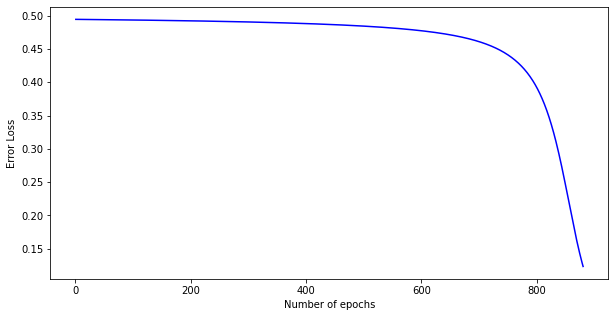

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
x0=1
x1=[0,1,0,1]
x2=[1,0,0,1]
y=[1,1,0,0]
test_data=[2,2]
v=[[np.double(-1.0),np.double(35.0)],[np.double(20),np.double(-10)],[np.double(10),np.double(-30)]]
w=[-20,25,10]
print("Initial Weights between i/p & hidden:",v)
print("Initial Weights between hidden & o/p:",w)
  
#v=[[np.double(-1.1),np.double(2.2)],[np.double(1.0),np.double(1.5)],[np.double(1.5),np.double(0.5)]]
#w=[1.0,0.5,0.5]
#v=np.random.rand(3,2)
#w=np.random.rand(3,1)
eta=0.1
epochs=100
vbest=np.random.uniform(size=(3,2))
wbest=np.random.uniform(size=(3))
minepoch=0
Emin=1000
E=[]
xe=[]
ycap=[0,0,0,0]
t=0
#Training Part
while ycap!=y:
  t=t+1
  Error=0
  for i in range(len(y)):
    Ii=[x0,np.float(x1[i]),np.float(x2[i])]
    Oi=Ii
    Ih=np.matmul(np.transpose(v),Oi)
    Oh=1/(1+np.exp(-Ih))
    Oh=np.insert(Oh, 0, 1, axis=0)
    Io=np.matmul(np.transpose(w),Oh)
    Oo=1/(1+np.exp(-Io))
    Error+=((y[i]-Oo)**2)/2
    if Oo>=0.5:
      ycap[i]=1
    else:
      ycap[i]=0
    if ycap[i]==y[i]:
      continue
    else:
      Ebyw1=-(y[i]-Oo)*Oo*(1-Oo)
      
      Ebyw1=Ebyw1.reshape(-1,1)
      Oh=Oh.reshape(-1,1)
      w=np.array(w).reshape(-1,1)
      delEbydelw=np.dot(Oh,np.transpose(Ebyw1))
      delEbydelv=np.dot(w,Ebyw1)
      Ii=np.array(Ii).reshape(-1,1)
      delEbydelv=delEbydelv*Oh*(1-Oh)
      #with_bias=Oh*(1-Oh)*Ii
      delEbydelv=delEbydelv[list(range(1,len(Oh)))]
      delEbydelv=np.dot(Ii,np.transpose(delEbydelv))
      w=w-np.dot(eta,delEbydelw)
      v=v-np.dot(eta,delEbydelv)
      '''
      delEbydelw=-(y[i]-Oo)*Oo*(1-Oo)*Oh
      delEbydelv=np.dot(w,(y[i]-Oo)*Oo*(1-Oo))
      with_bias=Oh*(1-Oh)*Ii
      without_bias=np.array(with_bias[list(range(1,len(Oh)))]).reshape(-1,1)
      delEbydelv=np.array(delEbydelv).reshape(-1,1)
      delEbydelv=-np.dot(delEbydelv,np.transpose(without_bias))
      w=w-np.dot(eta,delEbydelw)
      v=v-np.dot(eta,delEbydelv)
      '''
      #print(Ih,Oh,Io,Oo,delEbydelw,delEbydelv)
      #print(w,v)
  if Error<Emin:
    Emin=Error
    vbest=v
    wbest=w
    minepoch=t
  E.append(Error)
  xe.append(t)
print("Final Epochs:",t)
print("Final Weights between i/p & hidden:",v)
print("Final Weights between hidden & o/p:",w)
print("Final Error:",Error)

x = np.linspace(-6, 6, 100) 

m = -(v[1][0] / v[2][0])
c=-(v[0][0]/v[2][0])
h1 = m*x+c
o1=1/(1+np.exp(-h1))
m = -(v[1][1] / v[2][1])
c=-(v[0][1]/v[2][1])
h2 = m*x+c
o2=1/(1+np.exp(-h2))
Or=o1*w[1]+o2*w[2]+w[0]
yr=1/(1+np.exp(-Or))


fig = plt.figure(figsize = (10, 5))
for i in range(len(y)):
  plt.plot(x1[i],x2[i],'ro' if (y[i]== 1.0) else 'bo') 
plt.plot(x, h1,color="black")
plt.plot(x, h2,color="black")
plt.plot(x, Or,color="orange")  
plt.plot(x, yr,color="brown")

plt.xlim(-5, 5)
plt.ylim(-5, 5) 
plt.show() 
  
print("Convergence Predicted:",ycap)
print("Convergence Actual:",y)
fig = plt.figure(figsize = (10, 5))
plt.plot(xe,E,color="blue")
plt.xlabel("Number of epochs")
plt.ylabel("Error Loss")
plt.show()

  


In [ ]:
#Test Part
def test_data_xor(v,w,ts):
  Ii=[x0,np.float(ts[0]),np.float(ts[1])]
  Oi=Ii
  Ih=np.matmul(np.transpose(v),Oi)
  Oh=1/(1+np.exp(-Ih))
  Oh=np.insert(Oh, 0, 1, axis=0)
  Io=np.matmul(np.transpose(w),Oh)
  Oo=1/(1+np.exp(-Io))
  print(Oo)
  return Oo[0]
yc=[]
for i in range(len(x1)):
  ycap=test_data_xor(v,w,[x1[i],x2[i]])
  yc.append(ycap)

print("Predicted_value:",yc)
print("Optimal_values:",Emin,vbest,wbest,minepoch)


[0.99994669]
[0.9999513]
[0.00150358]
[0.49699242]
Predicted_value: [0.9999466919844291, 0.9999512984791125, 0.0015035766661579658, 0.4969924230559699]
Optimal_values: [0.12350187] [[ -1.          34.86364008]
 [ 20.         -10.13635992]
 [ 10.         -30.13635992]] [[-22.52826373]
 [ 22.47173627]
 [  9.98627918]] 880


***P1) MP Neuron for AND,OR,NOR,NAND Gate***

Initial_Weights: [1, 0.5, 0.5]
Convergence: False
Convergence: False
Convergence: True
Total Epochs: 2
Final Weights: [ 1.  -0.5 -0.5]


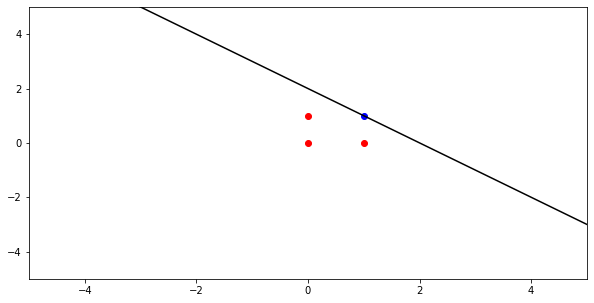

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
x1=[0,0,1,1]
x2=[0,1,0,1]
y=[1,1,1,0]
w=[1,0.5,0.5]
print("Initial_Weights:",w)
f=False
eta=1    
epochs=0
x0=1
while not f:
  prev=w
  for i in range(len(y)):
    X=[x0,np.float(x1[i]),np.float(x2[i])]
    Y=np.matmul(w,X)
    if Y>=0.5:
      yc=1
    else:
      yc=0
    if yc==y[i]:
      continue
    else:
      if y[i]==0 and yc==1:
        w=np.stack(w)-np.stack(eta*np.stack(X))
      elif y[i]==1 and yc==0:
        w=np.stack(w)+np.stack(eta*np.stack(X)) 
  v = np.array(prev) == np.array(w)
  print("Convergence:",v.all())
  if v.all()==True:
    f=True
    break
  else:
    epochs+=1
  

print("Total Epochs:",epochs)
print("Final Weights:",w)
    
x = np.linspace(-6, 6, 100) 
m = -(w[1] / w[2])
c=-(w[0] / w[2])
yr = m*x+c

fig = plt.figure(figsize = (10, 5))
for i in range(len(y)):
  plt.plot(x1[i],x2[i],'ro' if (y[i]== 1.0) else 'bo') 
plt.plot(x, yr,color="black")
plt.xlim(-5, 5)
plt.ylim(-5, 5) 
plt.show() 



